# <a id='#1'>1. Load libraries and read the data</a>


In [1]:
#!pip3 install --upgrade scikit-learn

## <a id='1.1'>1.1. Load libraries</a>

In [2]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
import sklearn
import string
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

## <a id='1.2'>1.2. Read the data</a>

In [3]:
data = pd.read_csv('../input/mri-nlp/cleaned_data_H.tsv',sep="\t")

In [4]:
import warnings
warnings.filterwarnings('ignore') #ignore warning messages 

In [5]:
data.head()

,Transcripts,AD
0,there's &um a young boy that's getting a cooki...,1
1,and it he's uh in bad shape because uh the thi...,1
2,and in the picture the mother is washing dishe...,1
3,and the dishes might get falled over if you don't,1
4,fell fall over there there if you don't get it,1


In [6]:
CLASS = 'AD'

In [7]:
df = data

# <a id='3'>3. Data preparation</a>

## <a id='3.1'>3.1. Cut dataset</a>

one for train and test (skf) = 90%, other for validation = 10%

In [8]:
import string

def stem_words(text):
    text = text.split()
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

def clean_data(text):
    sentence = text.lower()
    sentence_no_punct = sentence.translate(table_)
    space_remove = re.sub('\s+',' ', sentence_no_punct)
    return space_remove

table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
string_punctuation_1 = string.punctuation.replace(".","").replace("`","").replace("'","")
table_ = str.maketrans(string_punctuation_1, ' '*len(string_punctuation_1))
printable = set(string.printable)

stemmer = SnowballStemmer('english')
df['Transcripts_cleaned'] = df['Transcripts'].apply(lambda row: clean_data(row) )
df['Transcripts_stem'] = df['Transcripts_cleaned'].apply(lambda row: stem_words(row))
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,min_df=5, max_df=0.9) 
X = vectorizer.fit_transform(df['Transcripts_cleaned'].tolist())

In [9]:
X = X.toarray()
y= np.array(df['AD'].tolist())

# Model

In [10]:
print(np.unique(data[CLASS]))
df.shape

[0 1]


(3272, 4)

In [11]:
Y = df[CLASS]
df.shape,X.shape,Y.shape

((3272, 4), (3272, 316), (3272,))

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.3,
                                                 shuffle=True)

# Modelling basic

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
import sklearn
import string
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
def onevsall(y_true,y_pred,mod):
    
    
    global rdf
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    acc = (tp+tn)/(tp+tn+fp+fn)
    pre = tp/(tp+fp)
    rec = tp/(tp+fn)
    f1 = 2*rec*pre / (rec +pre)
    sp = tn / (tn +fp)
    #print('Done for '+mod)
    rdf=rdf.append({
            'Model':mod,
            'TN':tn,'FP':fp,'FN':fn,'TP':tp,
            'Accuracy':acc,
            'Precision':pre,
            'Recall or Sensitivity':rec,
            'F1 Score':f1,
            'Specificity':sp
        },ignore_index=True)
        
    return rdf

def roc(clf,x,y):
    import scikitplot as skplt
    import matplotlib.pyplot as plt
    skplt.metrics.plot_roc_curve(clf,x,y)
    plt.savefig('ROC'+model_name+'.jpg')
    plt.show()
    
def visualise(y_true,y_pred,name,model_name):
    ConfusionM = confusion_matrix(y_true,y_pred)

    #print('ROC AUC score:', 
    #multiclass_roc_auc_score(y_true,y_pred, ))
    print(classification_report(y_true,y_pred,   digits=4))
    print()
#     fig, ax = plt.subplots(figsize=(6,4)) 
#     import seaborn as sns
#     sns.heatmap(ConfusionM, annot=True,
#             fmt='g',xticklabels=name, yticklabels=name)
#     plt.title('Confusion Matrix for '+model_name)
#     plt.savefig('CM_'+model_name+'.jpg')
#     plt.show()
    return onevsall(y_true,y_pred,model_name)
def run(clf,X_train, y_train,X_test,y_test,viz):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true = y_test
    name = np.unique(y_train)
    #plot_roc_curve(clf, X_test,y_test) 
    if viz:
        return visualise(y_true,y_pred,name,clf.__class__.__name__),clf
    return onevsall(y_true,y_pred,clf.__class__.__name__)
def RNDF(X_train, y_train,X_test,Y_test,viz):
    for clf in tqdm(models_f1):
        #print(clf.__class__.__name__)
        #X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.4)
        run(clf,X_train, y_train,X_test,Y_test,viz)
    return rdf

In [14]:


from sklearn import ensemble
dir(ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'VotingClassifier',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_gradient_boosting',
 'bagging',
 'base',
 'forest',
 'gradient_boosting',
 'iforest',
 'partial_dependence',
 'voting_classifier',
 'weight_boosting']

In [15]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,confusion_matrix
from sklearn.ensemble import *
from mlxtend.classifier import StackingClassifier
rdf = pd.DataFrame()
models_f1 = []

models_f1 = []
models_f1.append(( RandomForestClassifier()))
models_f1.append((DecisionTreeClassifier()))
models_f1.append((SVC(kernel="linear", C=0.1,probability=True)))

models_f1 

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='linear', max_iter=-1, probability=True, random_state=None,
   shrinki

In [16]:
np.unique(Y)

array([0, 1])

In [17]:
from tqdm import tqdm
RNDF(X_train, Y_train,X_test, Y_test,True)

 33%|███▎      | 1/3 [00:00<00:00,  6.22it/s]

              precision    recall  f1-score   support

           0     0.8254    0.8254    0.8254       504
           1     0.8159    0.8159    0.8159       478

   micro avg     0.8208    0.8208    0.8208       982
   macro avg     0.8206    0.8206    0.8206       982
weighted avg     0.8208    0.8208    0.8208       982


              precision    recall  f1-score   support

           0     0.8317    0.8532    0.8423       504
           1     0.8409    0.8180    0.8293       478

   micro avg     0.8360    0.8360    0.8360       982
   macro avg     0.8363    0.8356    0.8358       982
weighted avg     0.8362    0.8360    0.8360       982




100%|██████████| 3/3 [00:13<00:00,  4.04s/it]

              precision    recall  f1-score   support

           0     0.6008    0.8571    0.7065       504
           1     0.7262    0.3996    0.5155       478

   micro avg     0.6344    0.6344    0.6344       982
   macro avg     0.6635    0.6284    0.6110       982
weighted avg     0.6619    0.6344    0.6135       982




,Accuracy,F1 Score,FN,FP,Model,Precision,Recall or Sensitivity,Specificity,TN,TP
0,0.820774,0.815900,88.0,88.0,RandomForestClassifier,0.815900,0.815900,0.825397,416.0,390.0
1,0.836049,0.829268,87.0,74.0,DecisionTreeClassifier,0.840860,0.817992,0.853175,430.0,391.0
2,0.634420,0.515520,287.0,72.0,SVC,0.726236,0.399582,0.857143,432.0,191.0


# Cross Validation on 10 random samples with swaping

In [18]:
# models_f1 is already trained

In [19]:
from sklearn.model_selection import ShuffleSplit
montecarlo_rns = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
j = 1
montedf = pd.DataFrame()
for _, test_index in tqdm(montecarlo_rns.split(X)):
    X_t = X[test_index]
    Y_t = y[test_index]
    rdf = pd.DataFrame()
    for clf in models_f1:
        y_pred = clf.predict(X_t)
        onevsall(Y_t,y_pred,clf.__class__.__name__)
    rdf['Monte_Carlo_iteration']='Iteration_'+str(j)
    montedf = pd.concat([montedf,rdf])
    j = j + 1

10it [00:06,  1.50it/s]


In [31]:
montedf.groupby(['Model']).mean()

,Accuracy,F1 Score,FN,FP,Precision,Recall or Sensitivity,Specificity,TN,TP
Model,,,,,,,,,
DecisionTreeClassifier,0.893893,0.891488,33.7,35.8,0.888946,0.894431,0.893330,299.9,285.6
RandomForestClassifier,0.887786,0.886452,32.4,41.1,0.874912,0.898595,0.877552,294.6,286.9
SVC,0.661679,0.557518,179.5,42.1,0.768273,0.437738,0.874505,293.6,139.8


In [30]:
montedf[montedf['Model'] == np.unique(montedf['Model'])[2]]

,Accuracy,F1 Score,FN,FP,Model,Precision,Recall or Sensitivity,Specificity,TN,TP,Monte_Carlo_iteration
2,0.661069,0.561265,181.0,41.0,SVC,0.775956,0.439628,0.876506,291.0,142.0,Iteration_1
2,0.668702,0.573674,172.0,45.0,SVC,0.764398,0.459119,0.866469,292.0,146.0,Iteration_2
2,0.650382,0.531697,189.0,40.0,SVC,0.764706,0.407524,0.880952,296.0,130.0,Iteration_3
2,0.661069,0.543210,181.0,41.0,SVC,0.763006,0.421725,0.880117,301.0,132.0,Iteration_4
2,0.671756,0.574257,176.0,39.0,SVC,0.788043,0.451713,0.883234,295.0,145.0,Iteration_5
2,0.656489,0.563107,182.0,43.0,SVC,0.771277,0.443425,0.868902,285.0,145.0,Iteration_6
2,0.659542,0.538302,180.0,43.0,SVC,0.751445,0.419355,0.875362,302.0,130.0,Iteration_7
2,0.688550,0.600000,164.0,40.0,SVC,0.792746,0.482650,0.881657,298.0,153.0,Iteration_8
2,0.644275,0.552783,186.0,47.0,SVC,0.753927,0.436364,0.855385,278.0,144.0,Iteration_9
2,0.654962,0.536885,184.0,42.0,SVC,0.757225,0.415873,0.876471,298.0,131.0,Iteration_10


In [29]:
montedf[montedf['Model'] == np.unique(montedf['Model'])[1]]

,Accuracy,F1 Score,FN,FP,Model,Precision,Recall or Sensitivity,Specificity,TN,TP,Monte_Carlo_iteration
0,0.882443,0.880620,39.0,38.0,RandomForestClassifier,0.881988,0.879257,0.885542,294.0,284.0,Iteration_1
0,0.885496,0.882629,36.0,39.0,RandomForestClassifier,0.878505,0.886792,0.884273,298.0,282.0,Iteration_2
0,0.882443,0.881356,33.0,44.0,RandomForestClassifier,0.866667,0.896552,0.869048,292.0,286.0,Iteration_3
0,0.883969,0.883077,26.0,50.0,RandomForestClassifier,0.851632,0.916933,0.853801,292.0,287.0,Iteration_4
0,0.882443,0.882083,33.0,44.0,RandomForestClassifier,0.867470,0.897196,0.868263,290.0,288.0,Iteration_5
0,0.883969,0.883792,38.0,38.0,RandomForestClassifier,0.883792,0.883792,0.884146,290.0,289.0,Iteration_6
0,0.894656,0.891680,26.0,43.0,RandomForestClassifier,0.868502,0.916129,0.875362,302.0,284.0,Iteration_7
0,0.900763,0.897638,32.0,33.0,RandomForestClassifier,0.896226,0.899054,0.902367,305.0,285.0,Iteration_8
0,0.890076,0.893805,27.0,45.0,RandomForestClassifier,0.870690,0.918182,0.861538,280.0,303.0,Iteration_9
0,0.891603,0.887836,34.0,37.0,RandomForestClassifier,0.883648,0.892063,0.891176,303.0,281.0,Iteration_10


In [28]:
montedf[montedf['Model'] == np.unique(montedf['Model'])[0]]

,Accuracy,F1 Score,FN,FP,Model,Precision,Recall or Sensitivity,Specificity,TN,TP,Monte_Carlo_iteration
1,0.887023,0.884735,39.0,35.0,DecisionTreeClassifier,0.890282,0.879257,0.894578,297.0,284.0,Iteration_1
1,0.890076,0.885350,40.0,32.0,DecisionTreeClassifier,0.896774,0.874214,0.905045,305.0,278.0,Iteration_2
1,0.887023,0.883648,38.0,36.0,DecisionTreeClassifier,0.886435,0.880878,0.892857,300.0,281.0,Iteration_3
1,0.891603,0.889922,26.0,45.0,DecisionTreeClassifier,0.864458,0.916933,0.868421,297.0,287.0,Iteration_4
1,0.890076,0.888889,33.0,39.0,DecisionTreeClassifier,0.880734,0.897196,0.883234,295.0,288.0,Iteration_5
1,0.900763,0.900459,33.0,32.0,DecisionTreeClassifier,0.901840,0.899083,0.902439,296.0,294.0,Iteration_6
1,0.893130,0.888889,30.0,40.0,DecisionTreeClassifier,0.875000,0.903226,0.884058,305.0,280.0,Iteration_7
1,0.903817,0.898876,37.0,26.0,DecisionTreeClassifier,0.915033,0.883281,0.923077,312.0,280.0,Iteration_8
1,0.894656,0.897778,27.0,42.0,DecisionTreeClassifier,0.878261,0.918182,0.870769,283.0,303.0,Iteration_9
1,0.900763,0.896332,34.0,31.0,DecisionTreeClassifier,0.900641,0.892063,0.908824,309.0,281.0,Iteration_10


In [20]:
print(montedf.shape)
montedf

(30, 11)


,Accuracy,F1 Score,FN,FP,Model,Precision,Recall or Sensitivity,Specificity,TN,TP,Monte_Carlo_iteration
0,0.882443,0.880620,39.0,38.0,RandomForestClassifier,0.881988,0.879257,0.885542,294.0,284.0,Iteration_1
1,0.887023,0.884735,39.0,35.0,DecisionTreeClassifier,0.890282,0.879257,0.894578,297.0,284.0,Iteration_1
2,0.661069,0.561265,181.0,41.0,SVC,0.775956,0.439628,0.876506,291.0,142.0,Iteration_1
0,0.885496,0.882629,36.0,39.0,RandomForestClassifier,0.878505,0.886792,0.884273,298.0,282.0,Iteration_2
1,0.890076,0.885350,40.0,32.0,DecisionTreeClassifier,0.896774,0.874214,0.905045,305.0,278.0,Iteration_2
2,0.668702,0.573674,172.0,45.0,SVC,0.764398,0.459119,0.866469,292.0,146.0,Iteration_2
0,0.882443,0.881356,33.0,44.0,RandomForestClassifier,0.866667,0.896552,0.869048,292.0,286.0,Iteration_3
1,0.887023,0.883648,38.0,36.0,DecisionTreeClassifier,0.886435,0.880878,0.892857,300.0,281.0,Iteration_3
2,0.650382,0.531697,189.0,40.0,SVC,0.764706,0.407524,0.880952,296.0,130.0,Iteration_3
0,0.883969,0.883077,26.0,50.0,RandomForestClassifier,0.851632,0.916933,0.853801,292.0,287.0,Iteration_4


In [21]:
montedf.to_csv('CV_ML.csv')

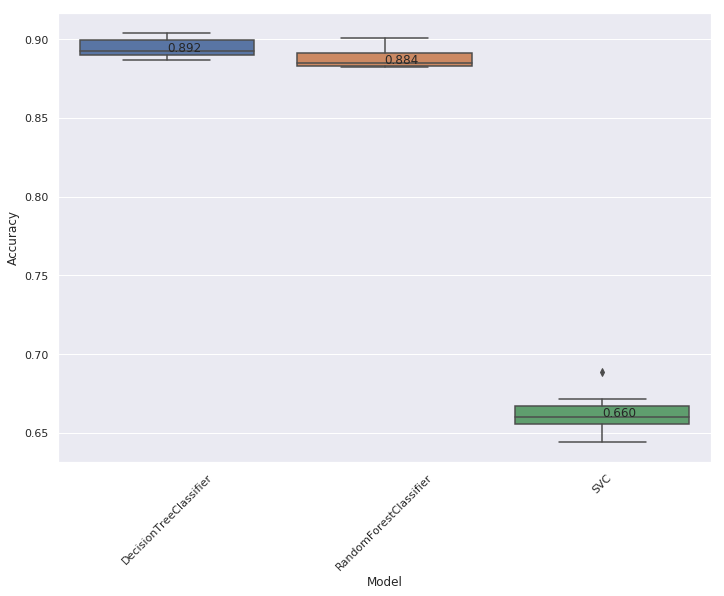

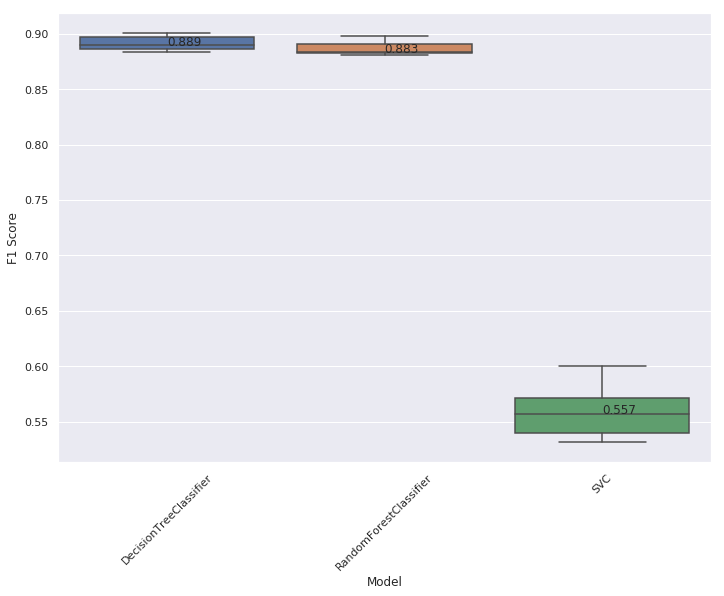

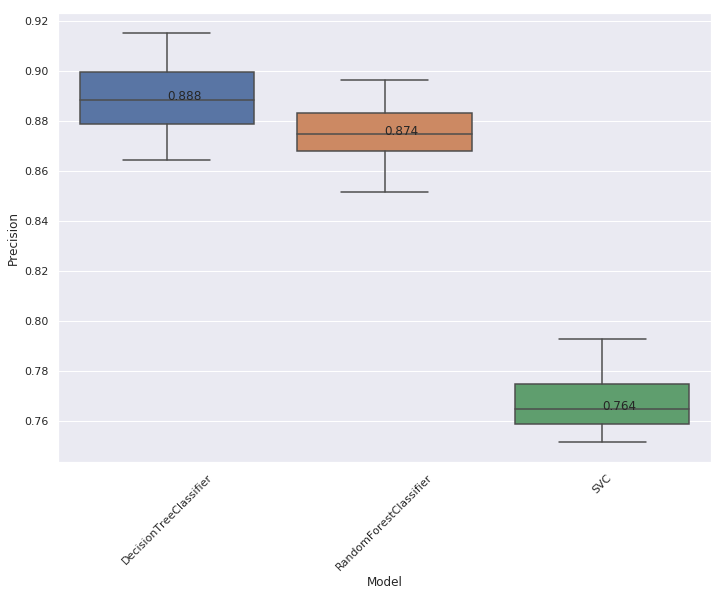

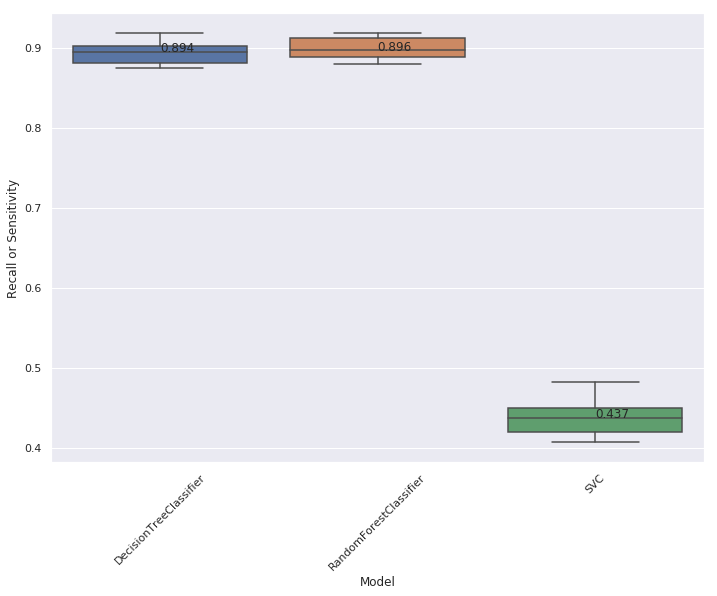

<Figure size 842.4x595.44 with 0 Axes>

In [22]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
for param in ['Accuracy', 'F1 Score', 'Precision',
       'Recall or Sensitivity',]:
    monteX = montedf.sort_values(by=['Model'], ascending=False)
    medians = monteX.groupby(['Model'])[param].median().reset_index()
    Order = list(medians['Model'])
    box = sns.boxplot(x="Model", y=param,order = Order,
                     data=montedf, linewidth=1.5)
    for i in range(len(medians[param])):
        box.annotate(str(medians.iloc[i][param])[:5],xy = (i,medians.iloc[i][param]), horizontalalignment='ceter')
    plt.xticks(rotation=45)
    plt.show()
    plt.savefig('CV_mean_'+param+'.jpg')

In [23]:
op = pd.DataFrame(montedf.groupby(['Model'])['Accuracy', 'F1 Score', 'Precision',
       'Recall or Sensitivity', 'Specificity'].mean().reset_index())
op.to_csv('CV_mean.csv')
op

,Model,Accuracy,F1 Score,Precision,Recall or Sensitivity,Specificity
0,DecisionTreeClassifier,0.893893,0.891488,0.888946,0.894431,0.893330
1,RandomForestClassifier,0.887786,0.886452,0.874912,0.898595,0.877552
2,SVC,0.661679,0.557518,0.768273,0.437738,0.874505


In [24]:
import os
os.listdir('./')

['__notebook_source__.ipynb',
 'CV_mean_Recall or Sensitivity.jpg',
 'CV_mean_Accuracy.jpg',
 'CV_mean_F1 Score.jpg',
 'CV_ML.csv',
 'CV_mean_Precision.jpg',
 'CV_mean.csv']

In [25]:
!ln -s ~/.local/bin/kaggle /usr/bin/kaggle

In [26]:
! sudo apt-get install zip

/bin/sh: 1: sudo: not found


In [27]:
!zip -r ML_CV_algo.zip ./

/bin/sh: 1: zip: not found
